<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Libraries</a></span></li><li><span><a href="#Load-data" data-toc-modified-id="Load-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#EDA-and-feature-engineering" data-toc-modified-id="EDA-and-feature-engineering-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA and feature engineering</a></span></li><li><span><a href="#Building-model" data-toc-modified-id="Building-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Building model</a></span></li><li><span><a href="#Random-forest-classifier" data-toc-modified-id="Random-forest-classifier-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Random forest classifier</a></span></li><li><span><a href="#Oversampling" data-toc-modified-id="Oversampling-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Oversampling</a></span></li><li><span><a href="#Undersampling" data-toc-modified-id="Undersampling-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Undersampling</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

## Import Libraries

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Load data

In [2]:
df= pd.read_csv('carclaims.csv')
df.head(5)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


## EDA and feature engineering

In [3]:
df['BasePolicy'].unique()

array(['Liability', 'Collision', 'All Perils'], dtype=object)

In [4]:
df['VehicleCategory'].unique()

array(['Sport', 'Utility', 'Sedan'], dtype=object)

In [5]:
df.shape

(15420, 33)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  PolicyNumber          15420 non-null

In [7]:
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days:Policy-Accident    0
Days:Policy-Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange-Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
FraudFound              0
dtype: int64

In [8]:
df['FraudFound'].value_counts()

No     14497
Yes      923
Name: FraudFound, dtype: int64

In [15]:
# Replace the Labels to 0 and 1
df.loc[df['FraudFound'] == 'No','FraudFound'] = 0
df.loc[df['FraudFound'] == 'Yes','FraudFound'] = 1

df['FraudFound'] = df['FraudFound'].astype(int)

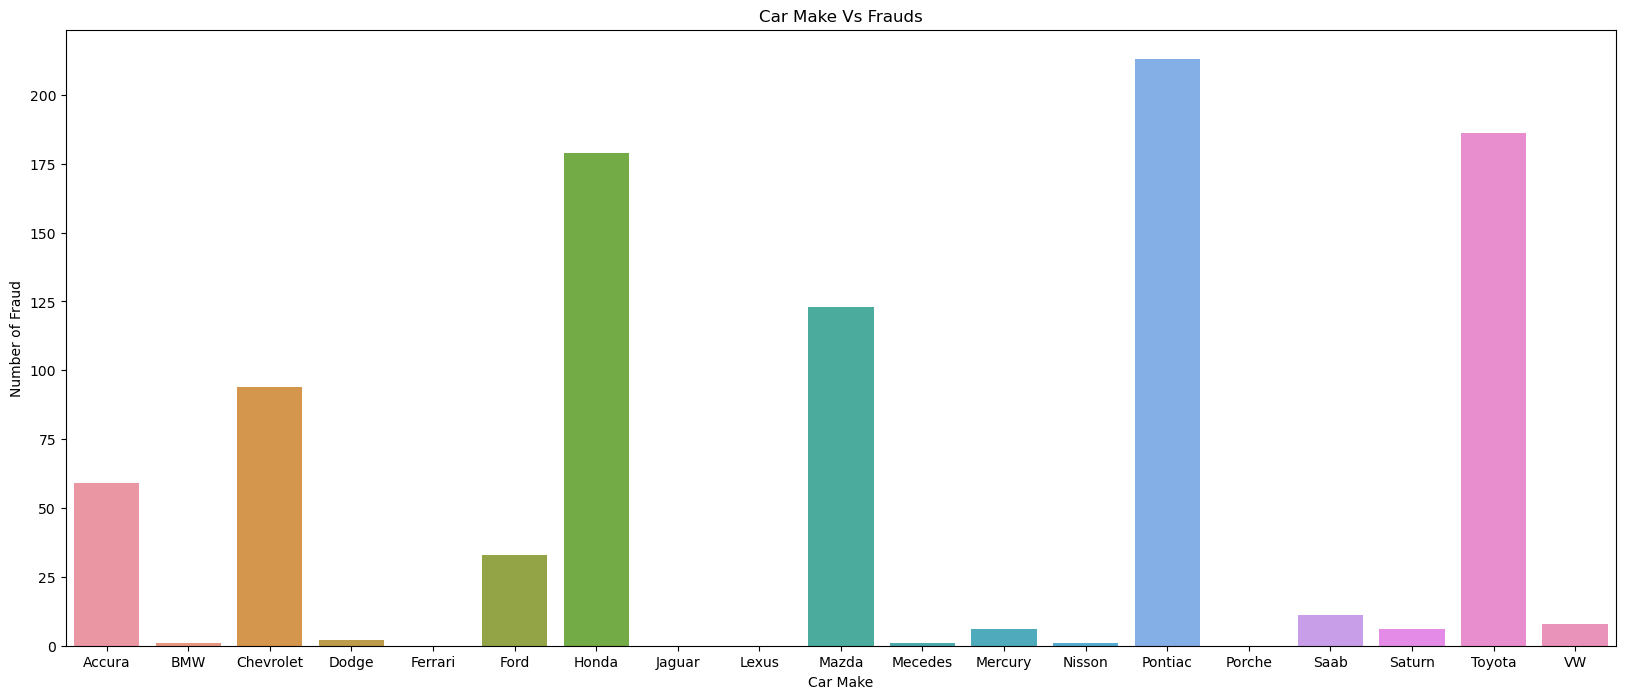

In [30]:
make = df.groupby('Make')['FraudFound'].sum()
plt.figure(figsize=(20,8))
plt.title("Car Make Vs Frauds")

sns.barplot(x=make.index,y=make.values)
plt.xlabel("Car Make")
plt.ylabel("Number of Fraud");
plt.show()

In [25]:
df['Make'].value_counts()

Pontiac      3837
Toyota       3121
Honda        2801
Mazda        2354
Chevrolet    1681
Accura        472
Ford          450
VW            283
Dodge         109
Saab          108
Mercury        83
Saturn         58
Nisson         30
BMW            15
Jaguar          6
Porche          5
Mecedes         4
Ferrari         2
Lexus           1
Name: Make, dtype: int64

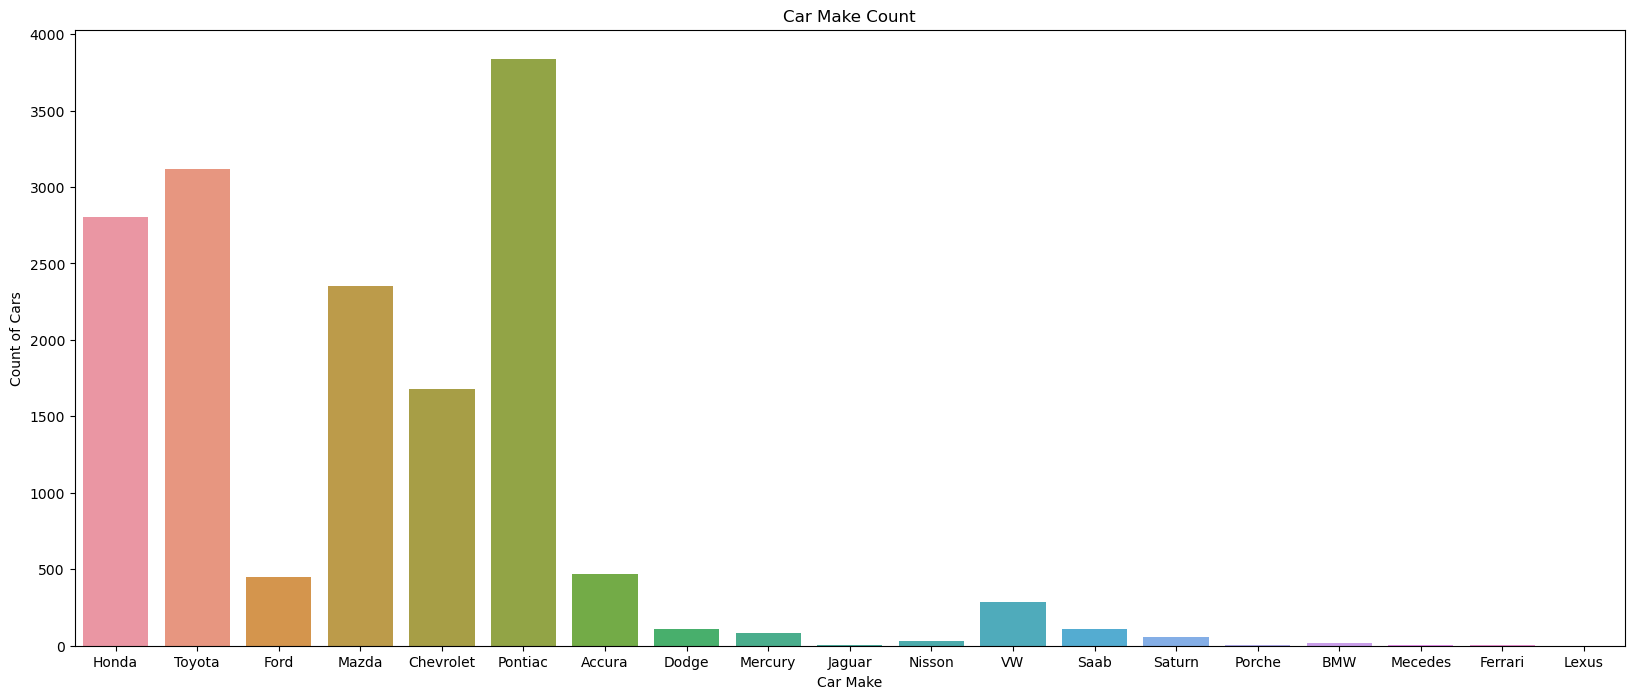

In [31]:
plt.figure(figsize=(20,8))
plt.title("Car Make Count")

sns.countplot(x=df['Make'])
plt.xlabel("Car Make")
plt.ylabel("Count of Cars");
plt.show()

In [ ]:
The mostly vechiles are Pontiac,Toyota,Honda. So the number of cars involved in an accident show why 
Jaguar,Lexus,Porche and Ferrari have no Fraud Claims while Pontiac,Toyota,Honda have more such claims.

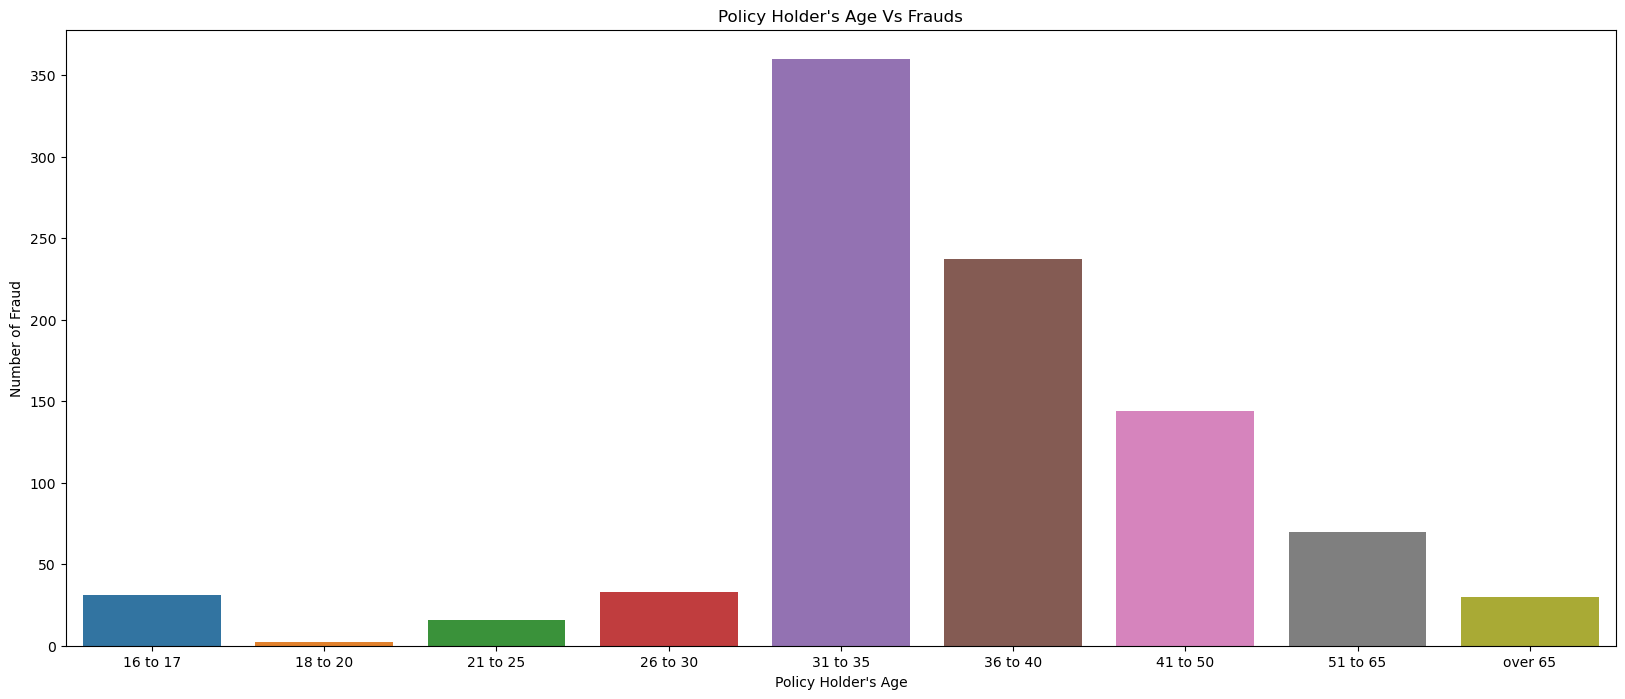

In [32]:
policyAge = df.groupby('AgeOfPolicyHolder')['FraudFound'].sum()
plt.figure(figsize=(20,8))
plt.title("Policy Holder's Age Vs Frauds")

sns.barplot(x=policyAge.index,y=policyAge.values)
plt.xlabel("Policy Holder's Age")
plt.ylabel("Number of Fraud")
plt.show()

In [52]:
df['Sex'].value_counts()

Male      13000
Female     2420
Name: Sex, dtype: int64

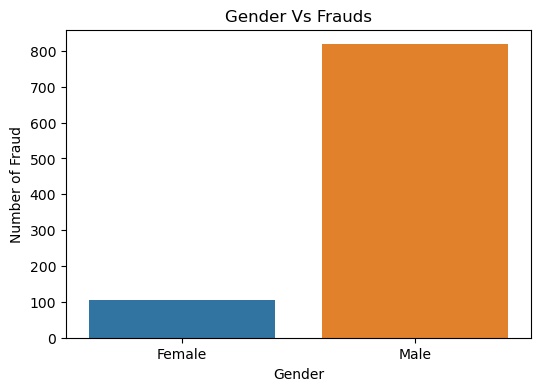

In [45]:
gender = df.groupby('Sex')['FraudFound'].sum()
plt.figure(figsize=(6,4))
plt.title("Gender Vs Frauds")
sns.barplot(x=gender.index,y=gender.values)

plt.xlabel("Gender")
plt.ylabel("Number of Fraud")
plt.show()

In [51]:
df['AccidentArea'].value_counts()

Urban    13822
Rural     1598
Name: AccidentArea, dtype: int64

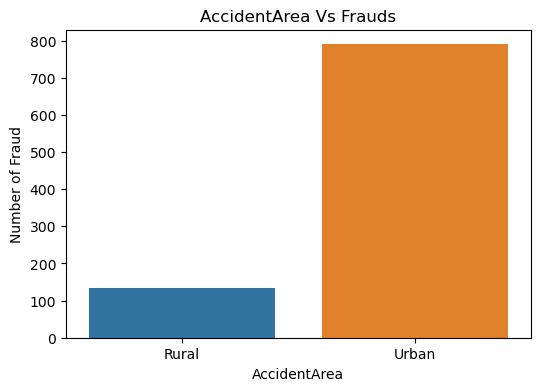

In [49]:
accidentArea = df.groupby('AccidentArea')['FraudFound'].sum()
plt.figure(figsize=(6,4))
plt.title("AccidentArea Vs Frauds")
sns.barplot(x=accidentArea.index,y=accidentArea.values)

plt.xlabel("AccidentArea")
plt.ylabel("Number of Fraud")
plt.show()

In [55]:
df['Fault'].value_counts()

Policy Holder    11230
Third Party       4190
Name: Fault, dtype: int64

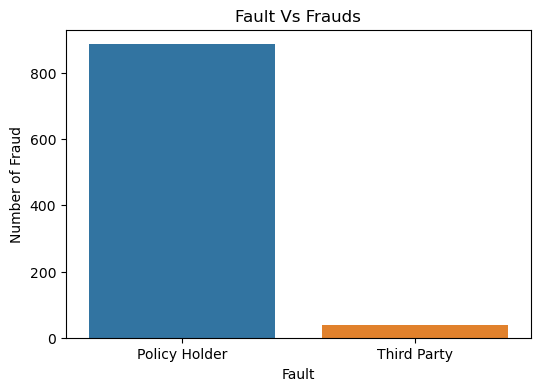

In [54]:
fault = df.groupby('Fault')['FraudFound'].sum()
plt.figure(figsize=(6,4))
plt.title("Fault Vs Frauds")
sns.barplot(x=fault.index,y=fault.values)

plt.xlabel("Fault")
plt.ylabel("Number of Fraud")
plt.show()

In [57]:
df['NumberOfCars'].value_counts()

1 vehicle      14316
2 vehicles       709
3 to 4           372
5 to 8            21
more than 8        2
Name: NumberOfCars, dtype: int64

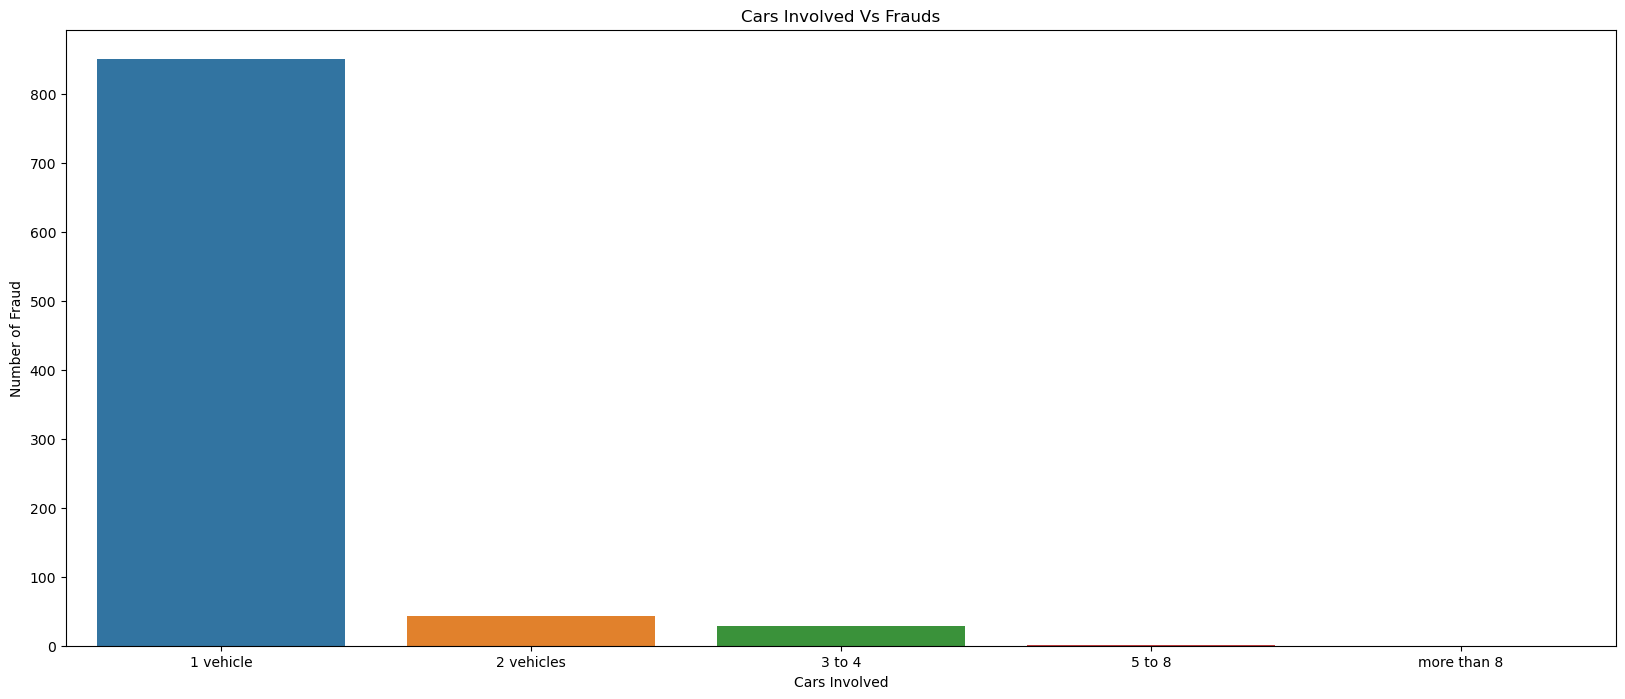

In [56]:
cars = df.groupby('NumberOfCars')['FraudFound'].sum()
plt.figure(figsize=(20,8))
plt.title("Cars Involved Vs Frauds")

sns.barplot(x=cars.index,y=cars.values)
plt.xlabel("Cars Involved")
plt.ylabel("Number of Fraud");
plt.show()

In [58]:
df['MaritalStatus'].value_counts()

Married     10625
Single       4684
Divorced       76
Widow          35
Name: MaritalStatus, dtype: int64

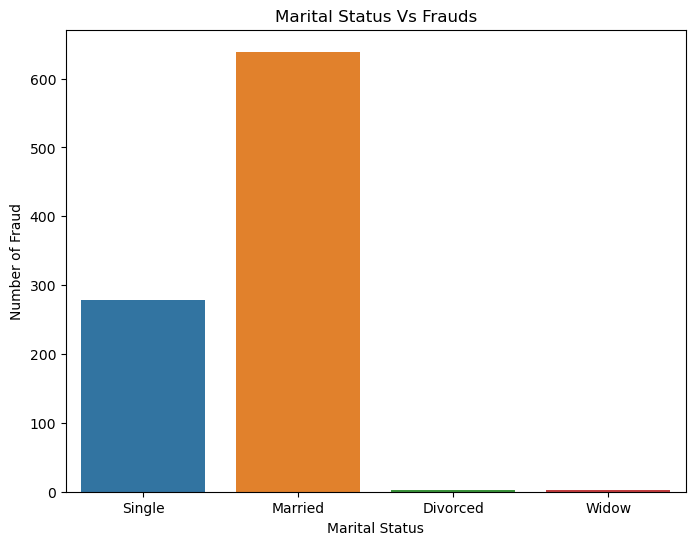

In [65]:
fraud = df[df['FraudFound'] == 1]
plt.figure(figsize=(8,6))
plt.title("Marital Status Vs Frauds")

sns.countplot(x=fraud['MaritalStatus']);
plt.xlabel("Marital Status")
plt.ylabel("Number of Fraud")
plt.show()

In [66]:
from sklearn.preprocessing import LabelEncoder

In [67]:
le= LabelEncoder()
cols = df.select_dtypes('O').columns

df[cols]= df[cols].apply(le.fit_transform)
df['Year'] = le.fit_transform(df.Year)

In [68]:
corr= df.corr()
corr

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
Month,1.000000,0.010631,-0.009539,0.000546,-0.000044,-0.025755,0.724350,0.042027,0.002912,-0.003970,...,0.010779,0.009988,-0.002106,0.015759,-0.010887,-0.007519,0.001343,0.028736,0.020496,-0.008670
WeekOfMonth,0.010631,1.000000,-0.011631,-0.001635,0.009116,0.015153,0.010057,0.275400,0.005314,0.019612,...,-0.002758,0.013026,0.013713,0.006477,-0.002903,0.008328,0.002521,-0.003906,-0.007765,-0.011861
DayOfWeek,-0.009539,-0.011631,1.000000,0.003368,0.006561,0.097745,-0.011879,-0.013871,-0.021240,-0.006635,...,0.013371,-0.011897,0.000139,0.011524,-0.010927,-0.005163,0.002006,0.002614,0.014889,-0.017456
Make,0.000546,-0.001635,0.003368,1.000000,0.004274,-0.005093,0.010118,-0.007832,-0.026381,-0.010647,...,0.052117,-0.008074,-0.000487,-0.014907,-0.025212,-0.003402,-0.000212,0.010880,-0.019868,-0.019187
AccidentArea,-0.000044,0.009116,0.006561,0.004274,1.000000,-0.011037,-0.002248,0.006584,-0.033804,0.003040,...,0.007964,0.001754,-0.028362,-0.005189,0.005056,0.003706,-0.007805,0.002284,0.043798,-0.033499
DayOfWeekClaimed,-0.025755,0.015153,0.097745,-0.005093,-0.011037,1.000000,-0.015568,0.013794,-0.000255,-0.018227,...,0.008848,-0.018367,-0.001387,-0.015376,0.019374,0.011229,-0.010416,0.003641,-0.014311,-0.002065
MonthClaimed,0.724350,0.010057,-0.011879,0.010118,-0.002248,-0.015568,1.000000,0.032591,-0.002214,-0.007955,...,0.019002,0.014008,-0.008587,0.016161,0.001370,-0.013402,-0.001779,0.021079,0.028323,-0.010247
WeekOfMonthClaimed,0.042027,0.275400,-0.013871,-0.007832,0.006584,0.013794,0.032591,1.000000,0.003739,0.000283,...,0.001397,0.023510,0.009369,-0.011314,-0.007100,-0.008343,0.008246,0.012175,0.013785,-0.005761
Sex,0.002912,0.005314,-0.021240,-0.026381,-0.033804,-0.000255,-0.002214,0.003739,1.000000,-0.114391,...,0.065444,-0.007413,-0.005585,0.012681,0.001952,0.004435,0.000081,0.000413,-0.069761,0.029953
MaritalStatus,-0.003970,0.019612,-0.006635,-0.010647,0.003040,-0.018227,-0.007955,0.000283,-0.114391,1.000000,...,-0.454045,0.011763,0.013862,0.007579,0.016742,-0.009533,-0.008308,-0.013994,0.047999,0.000568


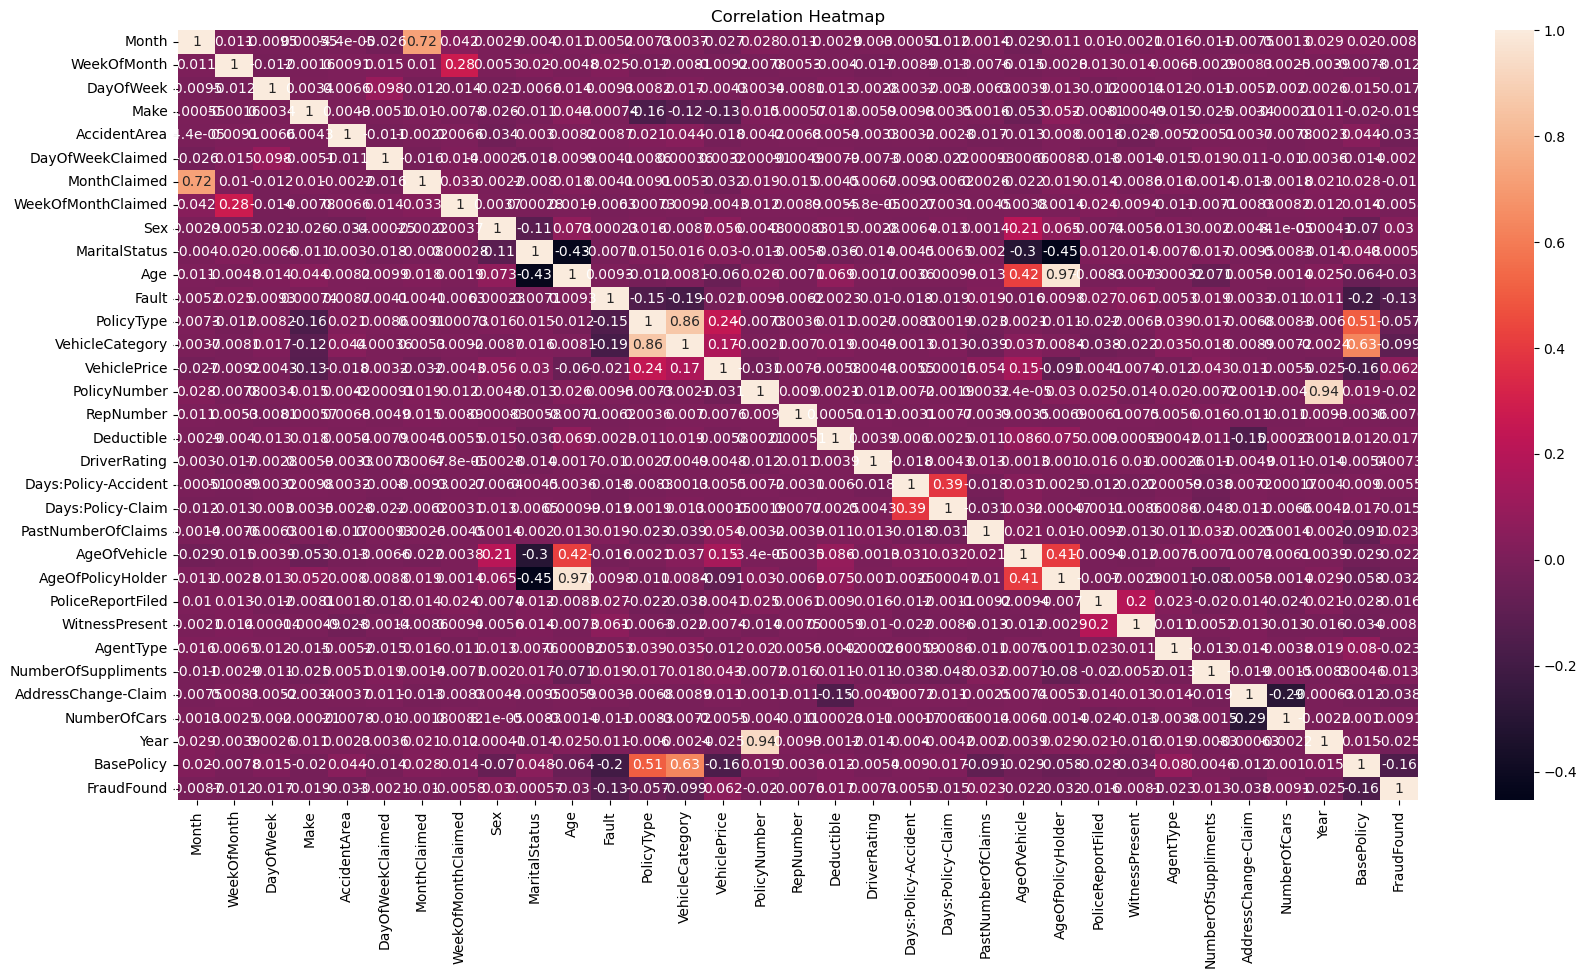

In [71]:
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [80]:
df= df.drop(['Month', 'WeekOfMonth', 'DayOfWeek', 'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Age', 
             'PolicyType', 'PolicyNumber', 'RepNumber', 'Deductible'],axis=1)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Make                  15420 non-null  int32
 1   AccidentArea          15420 non-null  int32
 2   Sex                   15420 non-null  int32
 3   MaritalStatus         15420 non-null  int32
 4   Fault                 15420 non-null  int32
 5   VehicleCategory       15420 non-null  int32
 6   VehiclePrice          15420 non-null  int32
 7   DriverRating          15420 non-null  int64
 8   Days:Policy-Accident  15420 non-null  int32
 9   Days:Policy-Claim     15420 non-null  int32
 10  PastNumberOfClaims    15420 non-null  int32
 11  AgeOfVehicle          15420 non-null  int32
 12  AgeOfPolicyHolder     15420 non-null  int32
 13  PoliceReportFiled     15420 non-null  int32
 14  WitnessPresent        15420 non-null  int32
 15  AgentType             15420 non-null  int32
 16  Numb

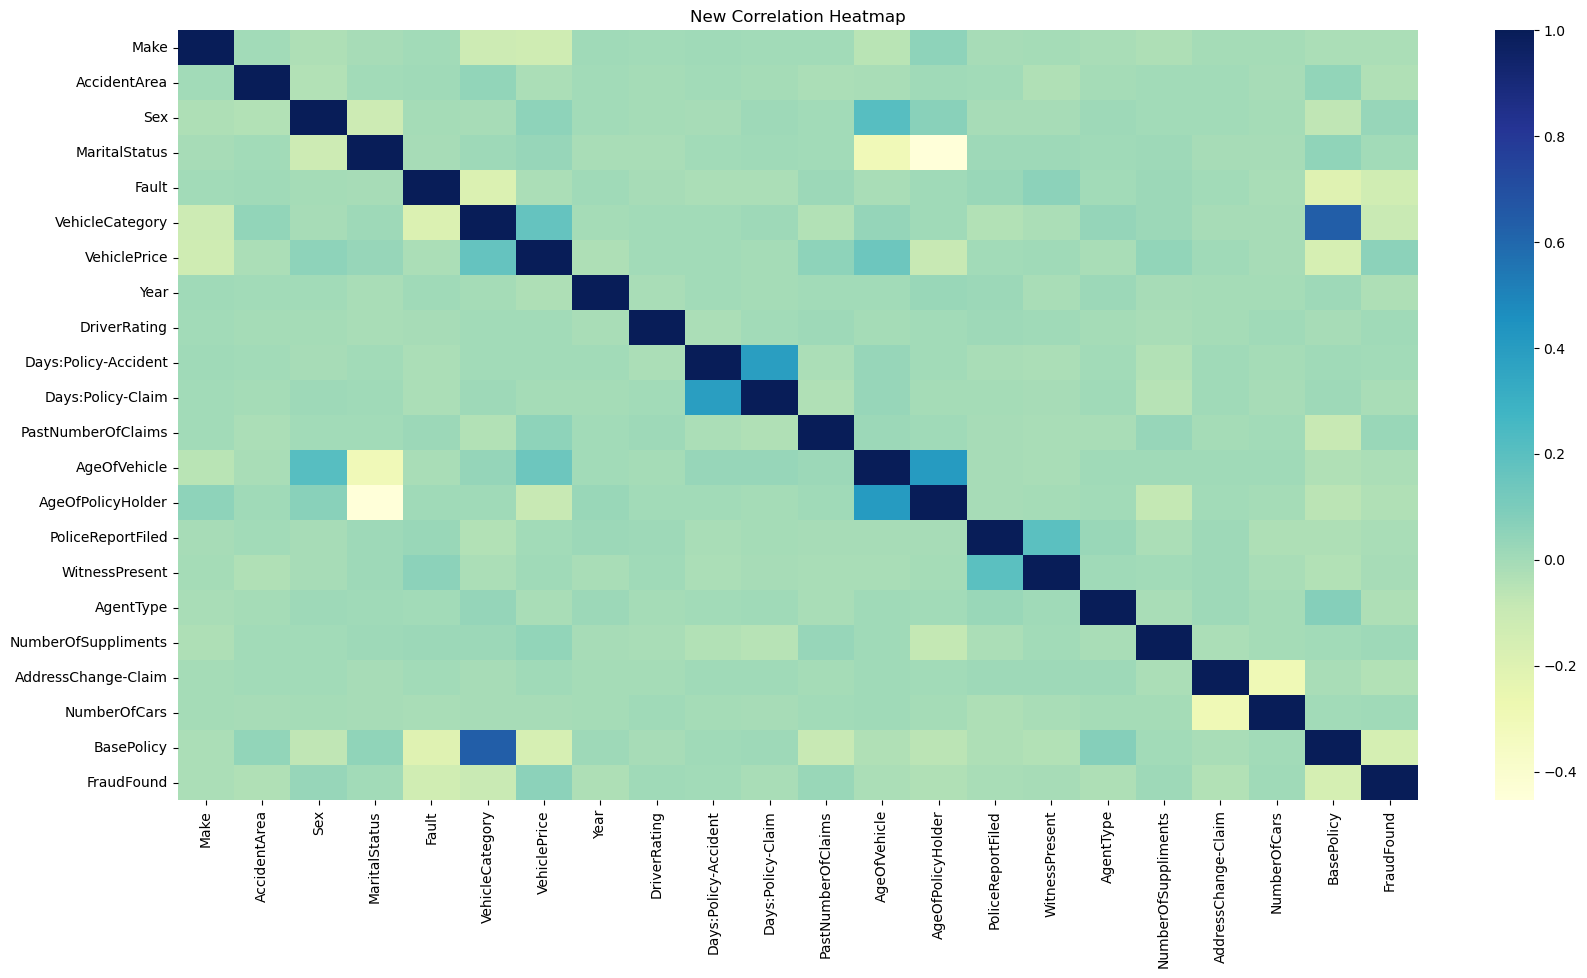

In [83]:
plt.figure(figsize=(20,10))
sns.heatmap(df_new.corr(),cmap="YlGnBu")
plt.title("New Correlation Heatmap")
plt.show()

In [84]:
x = df_new.drop('FraudFound',axis=1)
y = df_new[['FraudFound']]

## Building model

In [85]:
from sklearn.model_selection import train_test_split

In [122]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2)

## Random forest classifier

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [123]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_pred = rfc.predict(x_test)
acc_rfc=accuracy_score(y_test, rfc_pred)
print("Accuracy of the model:",acc_rfc)

Accuracy of the model: 0.9863202666973215


In [124]:
confusion_matrix(y_test,rfc_pred)

array([[4239,  119],
       [   0, 4341]], dtype=int64)

## Oversampling

In [108]:
from sklearn.utils import resample

In [125]:
n = df.FraudFound.value_counts()[0]

df_majority = df[df.FraudFound==0]
df_minority = df[df.FraudFound==1]

df_minority_upsampled = resample(df_minority,replace=True,n_samples = n,random_state=42)

df_upsampled = pd.concat([df_majority,df_minority_upsampled])
df_upsampled.FraudFound.value_counts()

0    14497
1    14497
Name: FraudFound, dtype: int64

In [113]:
x= df_upsampled.drop('FraudFound',axis=1)
y= df_upsampled['FraudFound']

In [126]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2)

In [127]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_upscale_pred = rfc.predict(x_test)

acc_rfc_upscale=accuracy_score(y_test, rfc_upscale_pred)
print("Accuracy of the model:",acc_rfc_upscale)

Accuracy of the model: 0.986090355213243


In [128]:
confusion_matrix(y_test,rfc_upscale_pred)

array([[4237,  121],
       [   0, 4341]], dtype=int64)

## Undersampling

In [129]:
n = df_new.FraudFound.value_counts()[1]

df_majority = df[df.FraudFound==0]
df_minority = df[df.FraudFound==1]

df_majority_downsampled = resample(df_majority,replace=False,n_samples = n,random_state=42)

df_downsampled = pd.concat([df_minority,df_majority_downsampled])
df_downsampled.FraudFound.value_counts()

1    923
0    923
Name: FraudFound, dtype: int64

In [130]:
x= df_downsampled.drop('FraudFound',axis=1)
y= df_downsampled['FraudFound']

In [132]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2)

In [133]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_downscale_pred = rfc.predict(x_test)
acc_rfc_downscale=accuracy_score(y_test, rfc_downscale_pred)
print("Accuracy of the model:",acc_rfc_downscale)

Accuracy of the model: 0.7707581227436823


In [134]:
confusion_matrix(y_test,rfc_downscale_pred)

array([[180, 100],
       [ 27, 247]], dtype=int64)

## Conclusion